In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt


from matplotlib.patches import Rectangle, Circle

# Exercise 3.2

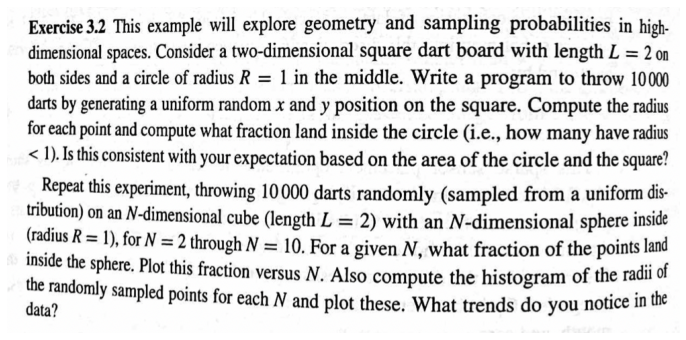

In [2]:
plt.figure(figsize=(15,6))
plt.imshow(plt.imread('./ex3.2.png'))
plt.axis('off');

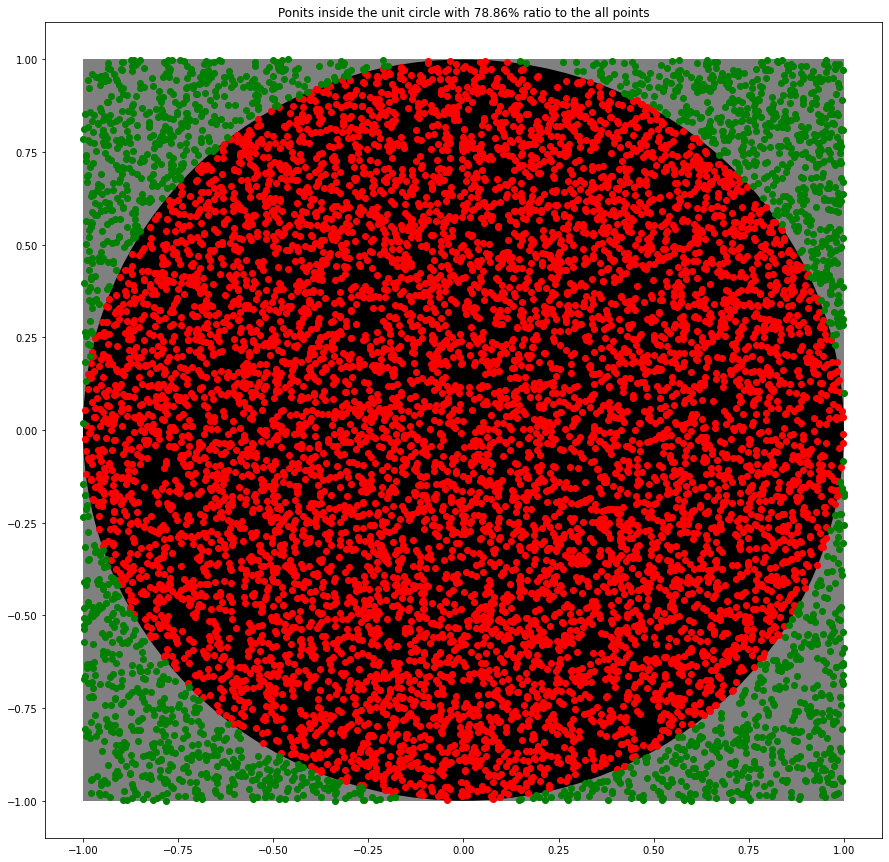

In [3]:
L = 2
R = 1
N = 10000

dataset = pd.DataFrame(np.vstack((sp.uniform(-1,2).rvs(N), sp.uniform(-1,2).rvs(N))).reshape(-1,2), columns=['x','y'])
circle_pts = dataset[(dataset.iloc[:,0]**2 + dataset.iloc[:,1]**2 <= 1)]
square_pts = dataset[~(dataset.iloc[:,0]**2 + dataset.iloc[:,1]**2 <= 1)]

f, ax = plt.subplots(figsize=(15,15))

ax.add_patch(Rectangle((-1,-1), L, L, fill=True, facecolor='gray'))
ax.add_patch(Circle((0,0), R, fill=True, facecolor='black' ))
ax.scatter(circle_pts.iloc[:,0], circle_pts.iloc[:,1], color='red')
ax.scatter(square_pts.iloc[:,0], square_pts.iloc[:,1], color='green')
ax.set_title('Ponits inside the unit circle with {}% ratio to the all points'.format(circle_pts.shape[0]/N * 100));

It's consistent with my expectations based on the area of circle and square. The areas ratio sould give us 78.5%. In our case with have slightly different due the calculations error.

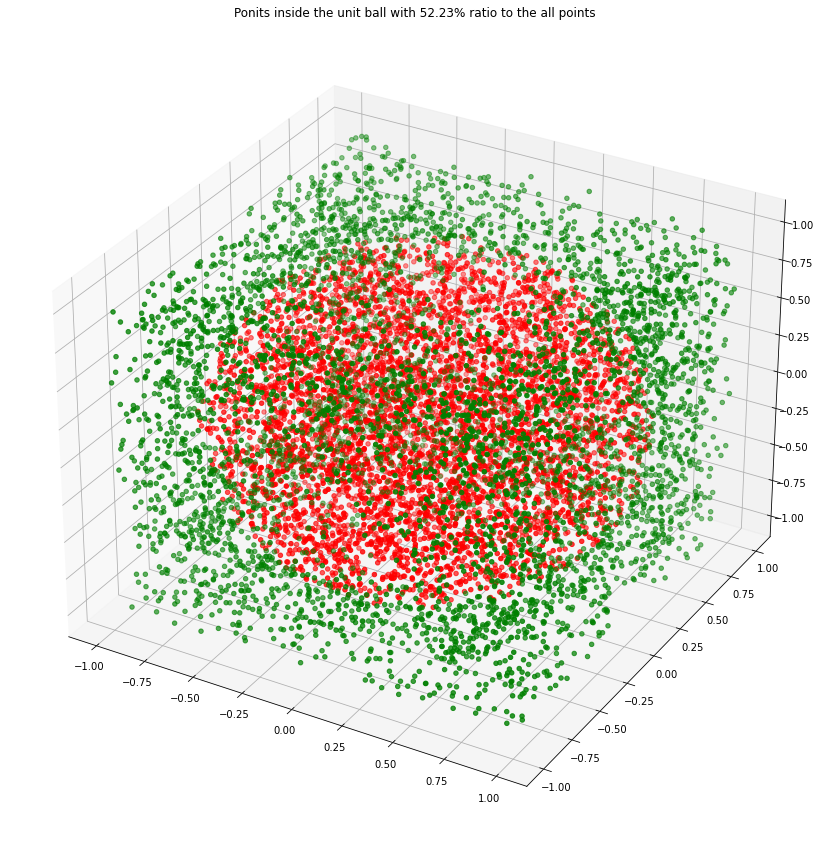

In [4]:
dataset['z'] = sp.uniform(-1,2).rvs(N)
ball_pts = dataset[(dataset.iloc[:,0]**2 + dataset.iloc[:,1]**2 + dataset.iloc[:,2]**2 <= 1)]
cube_pts = dataset[~(dataset.iloc[:,0]**2 + dataset.iloc[:,1]**2 + dataset.iloc[:,2]**2 <= 1)]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(ball_pts.iloc[:,0], ball_pts.iloc[:,1], ball_pts.iloc[:,2], color='red')
ax.scatter(cube_pts.iloc[:,0], cube_pts.iloc[:,1], cube_pts.iloc[:,2], color='green')
ax.set_title('Ponits inside the unit ball with {}% ratio to the all points'.format(ball_pts.shape[0]/N * 100));

dim = np.arange(4,11,1)

inside_n_dim_balls = np.array([circle_pts.shape[0]/N, ball_pts.shape[0]/N])
for i,n in enumerate(dim):
    dataset[i+4] = sp.uniform(-1,2).rvs(N)
    n_dim_ball_pts = dataset[((dataset**2).sum(axis=1) <= R**2)]
    # n_dim_cube_pts = dataset[~((dataset**2).sum(axis=1) <= R**2)]
    inside_n_dim_balls = np.append(inside_n_dim_balls, n_dim_ball_pts.shape[0]/N)

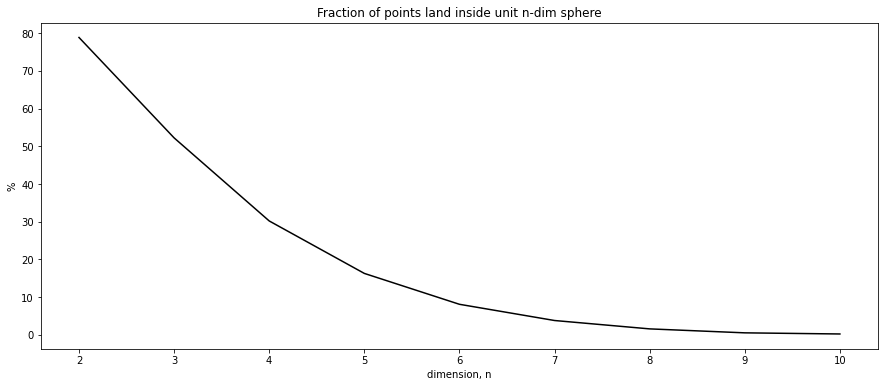

In [5]:
plt.figure(figsize=(15,6))
plt.plot(range(2,11), inside_n_dim_balls*100, color='k')
plt.title('Fraction of points land inside unit n-dim sphere')
plt.xlabel('dimension, n')
plt.ylabel('%');

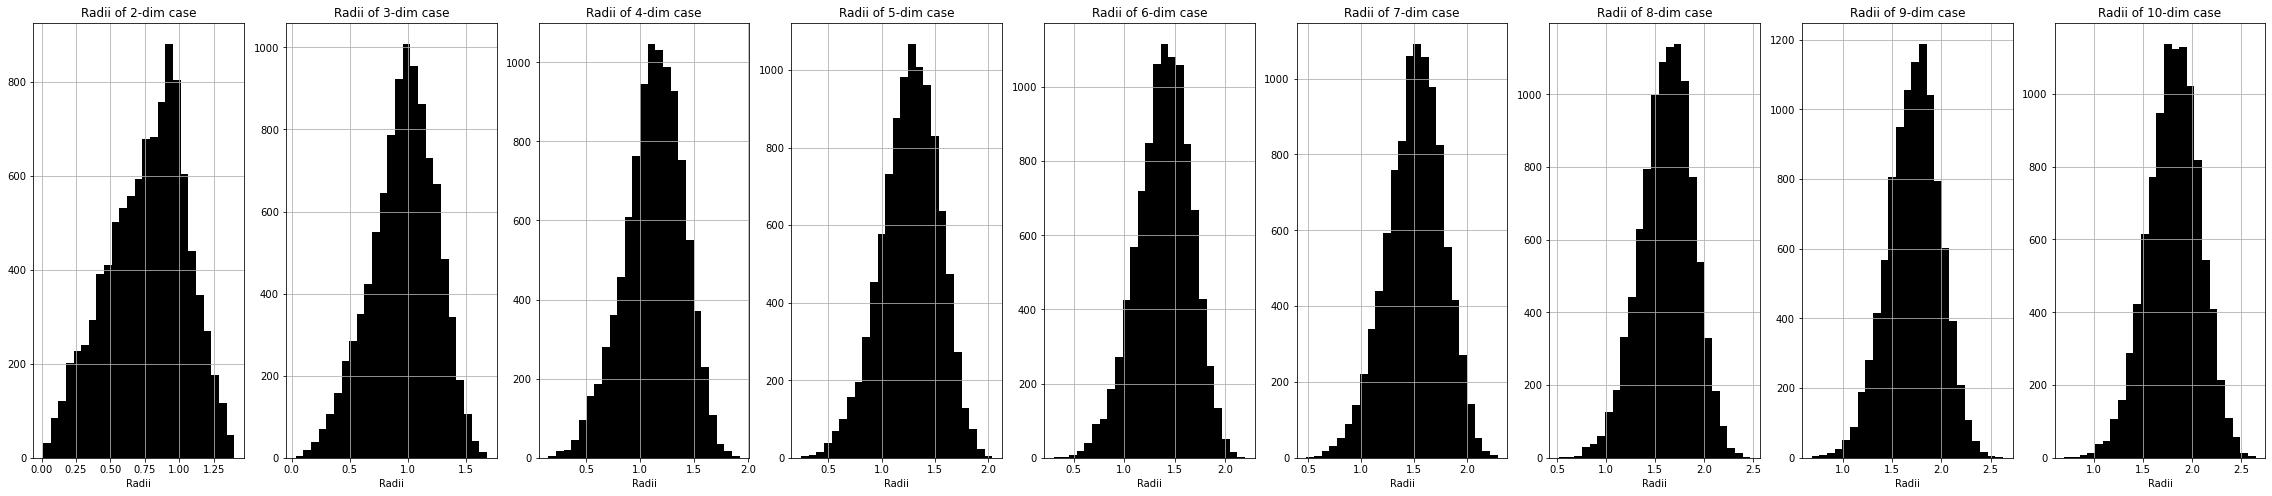

In [6]:
f, ax = plt.subplots(1,9, figsize=(40,8))
for i in range(2,11):
    np.sqrt((dataset.iloc[:,:i]**2).sum(axis=1)).hist(bins=25, color='k', ax=ax[i-2])
    ax[i-2].set_title('Radii of {}-dim case'.format(i))
    ax[i-2].set_xlabel('Radii');

Radii increases with n-dim

# Exercise 3.3

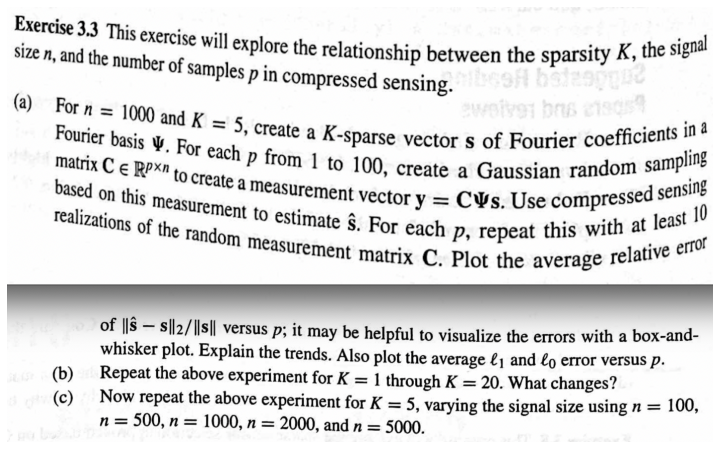

In [7]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./ex3.3.png'))
plt.axis('off');

In [ ]:
N = 1000
K = 5


# Exercise 3.6

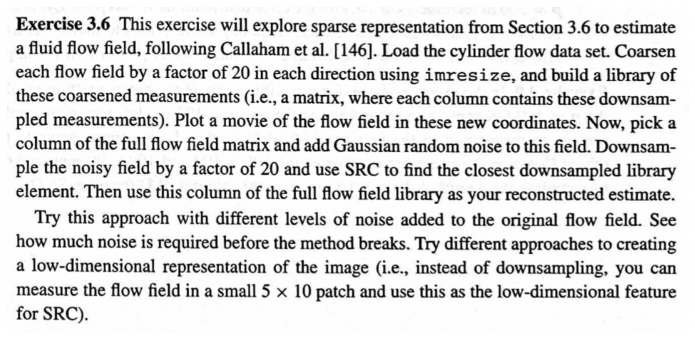

In [11]:
#ATTENTION! CYLINDER_ALL.mat is not added to DATA/FLUIDS folder due the github upload file size restrictions. 
#DONT run this notebook without putting data in the corresponding folders

plt.figure(figsize=(15,6))
plt.imshow(plt.imread('./ex3.6.png'))
plt.axis('off');

import scipy.io

In [10]:
mat_contents = scipy.io.loadmat('../DATA/FLUIDS/CYLINDER_ALL.mat')
UALL = mat_contents['UALL']
VALL = mat_contents['VALL']
VORTALL = mat_contents['VORTALL']

M, N = *mat_contents['m'], *mat_contents['n']